In [1]:
import pymysql
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandasql import sqldf
from sklearn import metrics

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [583]:
data = pd.read_csv("../../FEATURE_ENGINEER/tablon_undert_63_q4.csv").drop(
    columns=["ID", "DATE_MATCH", "TEAM_HOME", "TEAM_AWAY", "LEAGUE_INGLATERRA", "Unnamed: 0",
            "FAVOURITE_IS_HOME", "LEAGUE_ALEMANIA", "FAVOURITE_IS_AWAY", "LEAGUE_FRANCIA", "LEAGUE_ITALIA",
            "NUM_SAVESAWAY_L45", "AVG_CORNERSAWAY2_L3", "CORNERS_H_45_60", "CORNERS_DANGATTACKS_L45", "CORNERS_A",
            "TEMPERATURE", "NUM_DANGATTACKSAWAY_L45", "NUM_DANGATTACKSHOME_L45", "NUM_FOULSAWAY_L45", "NUM_ATTACKSHOME_L45",
            "NUM_TACKLEHOME_L45", "POSESSION_AWAY_L45", "IS_FAVOURITE_DRAWING", "SUM_GOALS_L60", "AVG_CORNERS_LOSE_AWAY",
            "AVG_CORNERSAWAYR2_L5", "AVG_CORNERSHOME2_L3","AVG_CORNERSHOMER2_L5","CORNERS_A_45_60","AVG_CORNERSHOME1_L3",
            "AVG_CORNERSHOME2_L5", "AVG_CORNERSAWAYR1_L3", "LEAGUE_ESPANA", "GOALS_A",
            "NUM_MATCHESAWAY_POSITIVE_L5", "NUM_SHOTSHOME_L45","WIND","RAIN"], 
    axis=1)

data = data[(data.TOTAL_CORNERS>2) & (data.TOTAL_CORNERS<7)].drop(columns=["TOTAL_CORNERS"],axis=1)

tablon = data[data.YEARMONTH<202109].drop(columns=["YEARMONTH"],axis=1)


X_validation = data[(data.YEARMONTH>=202109) & (data.YEARMONTH<202111)].drop(columns=["YEARMONTH"],axis=1)
y_validation = X_validation.pop("output")


X_validation_november = data[data.YEARMONTH>=202111].drop(columns=["YEARMONTH"],axis=1)
y_validation_november = X_validation_november.pop("output")

In [584]:
len_test = int(round(len(tablon)*0.2, 0))
len_train = int(round(len(tablon)*0.8, 0))

In [585]:
X_test = tablon[:len_test]
y_test = X_test.pop("output")
X_train = tablon[len_test:]
y_train = X_train.pop("output")

In [586]:
X_train.shape, X_test.shape, X_validation.shape

((4478, 56), (1120, 56), (205, 56))

In [587]:
y_train.value_counts()

1    3027
0    1451
Name: output, dtype: int64

In [588]:
y_test.value_counts()

1    703
0    417
Name: output, dtype: int64

In [589]:
y_validation.value_counts()

1    139
0     66
Name: output, dtype: int64

## EXECUTING BEST MODEL

In [590]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=150, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, 
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

/home/root/opt/python3.7.11/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.54775	validation_0-logloss:0.69146	validation_0-error:0.37946
[1]	validation_0-auc:0.56029	validation_0-logloss:0.68976	validation_0-error:0.37321
[2]	validation_0-auc:0.56392	validation_0-logloss:0.68815	validation_0-error:0.37411
[3]	validation_0-auc:0.56977	validation_0-logloss:0.68649	validation_0-error:0.37321
[4]	validation_0-auc:0.56928	validation_0-logloss:0.68500	validation_0-error:0.37232
[5]	validation_0-auc:0.57084	validation_0-logloss:0.68359	validation_0-error:0.37232
[6]	validation_0-auc:0.56936	validation_0-logloss:0.68221	validation_0-error:0.37232
[7]	validation_0-auc:0.57266	validation_0-logloss:0.68085	validation_0-error:0.37232
[8]	validation_0-auc:0.57335	validation_0-logloss:0.67952	validation_0-error:0.37232
[9]	validation_0-auc:0.57092	validation_0-logloss:0.67835	validation_0-error:0.37232
[10]	validation_0-auc:0.56639	validation_0-logloss:0.67720	validation_0-error:0.37232
[11]	validation_0-auc:0.56666	validation_0-logloss:0.67600	valid

[96]	validation_0-auc:0.58012	validation_0-logloss:0.64503	validation_0-error:0.37321
[97]	validation_0-auc:0.58072	validation_0-logloss:0.64496	validation_0-error:0.37321
[98]	validation_0-auc:0.58191	validation_0-logloss:0.64478	validation_0-error:0.37321
[99]	validation_0-auc:0.58221	validation_0-logloss:0.64473	validation_0-error:0.37321
[100]	validation_0-auc:0.58256	validation_0-logloss:0.64467	validation_0-error:0.37321
[101]	validation_0-auc:0.58311	validation_0-logloss:0.64461	validation_0-error:0.37321
[102]	validation_0-auc:0.58385	validation_0-logloss:0.64453	validation_0-error:0.37321
[103]	validation_0-auc:0.58427	validation_0-logloss:0.64449	validation_0-error:0.37321
[104]	validation_0-auc:0.58442	validation_0-logloss:0.64447	validation_0-error:0.37321
[105]	validation_0-auc:0.58543	validation_0-logloss:0.64435	validation_0-error:0.37321
[106]	validation_0-auc:0.58502	validation_0-logloss:0.64443	validation_0-error:0.37232
[107]	validation_0-auc:0.58526	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

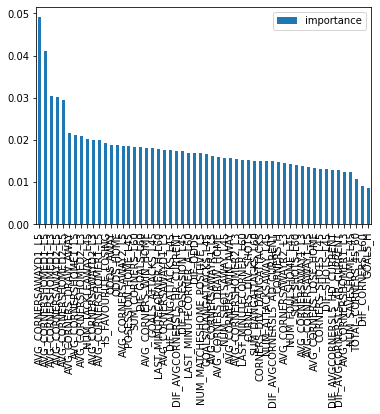

In [591]:
fu_dict = dict(zip(X_train.columns, model.feature_importances_))
fi = pd.DataFrame(fu_dict.values(), index=fu_dict.keys(), columns=["importance"])
fi = fi.sort_values(by="importance", ascending=False)

fi.plot.bar()

In [593]:
y_pred1 = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
cm

array([[  1, 416],
       [  2, 701]])

In [649]:
y_pred_proba = model.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba > 0.7, 1, 0)
cm1 = confusion_matrix(y_test, predict_mine)

In [650]:
metrics.accuracy_score(y_test, y_pred1)

0.6267857142857143

In [651]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

(0.7321428571428571, 0.0)

In [652]:
(cm1[1][1]+cm1[0][1])/len(y_test)*100, (cm[0][0]+cm[1][0])/len(y_test)*100

(20.0, 0.08928571428571429)

# VALIDATION - BEST MODEL --> 70% accuracy in 17% of matches

In [598]:
y_pred = model.predict(X_validation)
cm = confusion_matrix(y_validation, y_pred)
cm

array([[  1,  65],
       [  2, 137]])

In [599]:
metrics.accuracy_score(y_validation, y_pred)

0.6731707317073171

In [646]:
y_pred_proba = model.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba > 0.7, 1, 0)
cm1 = confusion_matrix(y_validation, predict_mine)

In [647]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

(0.7441860465116279, 0.0)

In [648]:
(cm1[1][1]+cm1[0][1])/len(y_validation)*100, (cm[0][0]+cm[1][0])/len(y_validation)*100

(20.975609756097562, 0.4878048780487805)

In [603]:
cm1

array([[ 55,  11],
       [107,  32]])

## FINAL VALIDATION - NOVEMBER 2021

In [604]:
y_pred = model.predict(X_validation_november)
cm = confusion_matrix(y_validation_november, y_pred)
cm

array([[ 0, 40],
       [ 1, 81]])

In [605]:
metrics.accuracy_score(y_validation_november, y_pred)

0.6639344262295082

In [642]:
y_pred_proba = model.predict_proba(X_validation_november)[:,1]
predict_mine = np.where(y_pred_proba > 0.71, 1, 0)
cm1 = confusion_matrix(y_validation_november, predict_mine)

In [643]:
cm1

array([[38,  2],
       [69, 13]])

In [644]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

(0.8666666666666667, 0.0)

In [645]:
(cm1[1][1]+cm1[0][1])/len(y_validation_november)*100, (cm[0][0]+cm[1][0])/len(y_validation_november)*100

(12.295081967213115, 0.819672131147541)

In [ ]:
#umbral --> 0.63; Condition --> TOTAL_CORNERS > 3
import pickle
file_name = "model_under4_63.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))


# OUTPUT

In [130]:
output = data[(data.YEARMONTH>=202111 )& (data.TOTAL_CORNERS>3)][["ID", "output", "CORNERS_H", "CORNERS_A", "TOTAL_CORNERS"]].reset_index(drop=True)

In [131]:
output["PROB_CORNERS"] = pd.DataFrame(model.predict_proba(X_validation_november)[:,1]).iloc[:, 0]\
    .apply(lambda x: 1 if x>0.6 else 0)

In [132]:
output[output.PROB_CORNERS==1]

,ID,output,CORNERS_H,CORNERS_A,TOTAL_CORNERS,PROB_CORNERS
0,E30fSmrc,1,5,0,5,1
1,nsYoAO57,1,5,1,6,1
2,p0AwSvlE,1,4,4,8,1
7,Oj9sRb3K,1,4,3,7,1
8,dCFxXoDK,1,2,4,6,1
9,vyLXXRcE,1,4,2,6,1
14,80vLFh5r,0,2,5,7,1
15,fZaDLxRs,0,1,7,8,1
16,ID8oQIIQ,1,5,1,6,1
17,GllMJGef,1,5,4,9,1
